<table align="left">
<tr>

<th, style="background-color:white">
<img src="https://github.com/mlgill/ODSC_East_2017_PythonNLP/blob/master/assets/logo.png?raw=true", width=140, height=100>
</th>

<th, style="background-color:white">
<div align="left">
<h1>Learning from Text: <br> Introduction to Natural Language Processing with Python</h1>  
<h2>Michelle L. Gill, Ph.D.</h2>     
Senior Data Scientist, Metis  
ODSC East  
May 3, 2017 
</div>
</th>

</tr>
</table>  

## Text Classification Exercise Answers

We will be using the SMS spam data from the previous set of exercises. 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

%matplotlib inline

Load the data and, for convenience, use the preprocessing function from `accessory_functions`. Alternatively, the pickled preprocessed dataframe could be loaded with the following code:

```python
data = pd.read_pickle('../data/spam_preprocessed.pkl')
data.head()
```

In [2]:
from accessory_functions import preprocess_series_text, nltk_path

data = pd.read_csv('../data/spam.csv', sep='\t')
data['text'] = preprocess_series_text(data.text, nltk_path=nltk_path)

data.head()

,label,text
0,ham,early bird purchase yet
1,spam,hi mandy sullivan call hotmix fm choose receiv...
2,ham,heart empty without love mind empty without wi...
3,ham,yes start send request make pain come back bac...
4,ham,see swing bit get thing take care firsg


Split the data into X (features) and y (predictor) data sets.

In [3]:
X = data.text
y = data.label

## Question 1

* Split in to train and test sets
* Create numerical features with Count Vectorizer. Multiple sets of features can be created with binary or integer word counts and either unigram (single word) or multi-gram features. Multiple sets of features can be created for comparison, too.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.3,
                                random_state=42)

Create numerical features. This data has already been preprocessed quite extensively, so there's not an explicit need to perform more. The first count vectorizer model will use integer counts and unigrams.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer()

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

print(X_train_cv1.toarray().shape)

(3900, 5482)


A second count vectorizer model will be created that has binary values and unigrams and bigrams.

In [6]:
cv2 = CountVectorizer(binary=True, ngram_range=(1,2))

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

print(X_train_cv2.toarray().shape)

(3900, 26864)


## Question 2

* Create and train a logistic regression model using the count vectorizer results
* Measure the error on these models and compare the results

We will use logistic regression with cross validation, which will automatically train some of the model parameters. The first count vectorizer matrix is used as input.

In [7]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(Cs=10, cv=3)

lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

The second count vectorizer matrix.

In [8]:
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

Measure the accuracy of the models and compare the results.

In [9]:
from sklearn.metrics import accuracy_score

acc1 = accuracy_score(y_test, y_pred_cv1)
acc2 = accuracy_score(y_test, y_pred_cv2)

print(acc1, acc2)

0.97966507177 0.979066985646


Plot the confusion matrix for both models.

In [10]:
y_test.value_counts()

ham     1449
spam     223
Name: label, dtype: int64

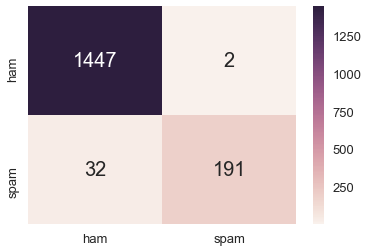

In [11]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_cv1),
            xticklabels=['ham', 'spam'],
            yticklabels=['ham', 'spam'],
            annot=True, fmt='d', annot_kws={'fontsize':20});

Now for the second logistic regression model.

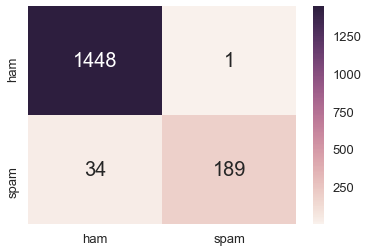

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred_cv2),
            xticklabels=['ham', 'spam'],
            yticklabels=['ham', 'spam'],
            annot=True, fmt='d', annot_kws={'fontsize':20});

## Question 3

Pick any other machine learning model and train it. Naive Bayes is an easy one because it doesn't have many additional parameters to tune. For count data, use [Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). For binary data, choose [Bernoulli Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB).

In [13]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [14]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv2)

The accuracy measurements. Logistic regression performs similarly or better than Naive Bayes.

In [15]:
acc1_nb = accuracy_score(y_test, y_pred_cv1_nb)
acc2_nb = accuracy_score(y_test, y_pred_cv2_nb)

pd.DataFrame({'CV1_LR': acc1, 'CV2_LR': acc2,
              'CV1_NB': acc1_nb, 'CV2_NB': acc2_nb},
             index=pd.Index(['accuracy'])).T

,accuracy
CV1_LR,0.979665
CV1_NB,0.979665
CV2_LR,0.979067
CV2_NB,0.929426


## Question 4

**NOTE:** this question should be completed after the TF-IDF section is discussed.

Use Scikit-learn's [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to create a term document matrix and then train one of the models used previously. The syntax is similar to Count Vectorizer. TF-IDF has parameters similar to those of Count Vectorizer. However, `use_binary` is not a feature, but `use_idf` is.

Here is an example:

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
```

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer()

# TF-IDF 
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

# Fit logistic regression
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1 = lr.predict(X_test_tfidf1)

# Accuracy
print(accuracy_score(y_test, y_pred_tfidf1))

0.980263157895


In [17]:
tfidf2 = TfidfVectorizer(use_idf=False)

# TF (no IDF)
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

# Fit logistic regression
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2 = lr.predict(X_test_tfidf2)

# Accuracy
print(accuracy_score(y_test, y_pred_tfidf2))

0.981459330144
